In [2]:

import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k
import seaborn as sns                     
import sklearn                            

sns.set(rc={'figure.figsize':(12,10)})

In [3]:

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Ana.csv')


df.head(10)

Saving Ana.csv to Ana (1).csv


,S. No.,Age,Sex,Haemoglobin,MCH,MCHC,MCV,RBC,Platlets,IDENTIFICATION
0,1,28,0,14.9,22.7,29.1,83.7,5.66,128.3,Not Anaemia
1,2,41,0,15.9,25.4,28.3,72.0,4.78,419.0,Not Anaemia
2,3,40,1,9.0,21.5,29.6,71.2,4.65,325.0,Anaemia
3,4,76,0,14.9,16.0,31.4,87.5,4.24,264.0,Not Anaemia
4,5,20,1,14.7,22.0,28.2,99.5,4.14,196.0,Not Anaemia
5,6,24,0,11.6,22.3,30.9,74.5,4.29,233.0,Anaemia
6,7,28,1,12.7,19.5,28.9,82.9,4.98,213.0,Anaemia
7,8,14,0,12.7,28.5,28.2,92.3,4.97,229.0,Anaemia
8,9,16,0,14.1,29.7,30.5,75.2,4.16,211.0,Not Anaemia
9,10,62,0,14.9,25.8,31.3,82.9,5.25,151.0,Not Anaemia


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   S. No.          199 non-null    int64  
 1   Age             199 non-null    int64  
 2   Sex             199 non-null    int64  
 3   Haemoglobin     199 non-null    float64
 4   MCH             199 non-null    float64
 5   MCHC            199 non-null    float64
 6   MCV             199 non-null    float64
 7   RBC             199 non-null    float64
 8   Platlets        199 non-null    float64
 9   IDENTIFICATION  199 non-null    object 
dtypes: float64(6), int64(3), object(1)
memory usage: 15.7+ KB


In [5]:

df.shape

(199, 10)

In [ ]:
#Create a list of column names to keep
column_to_retain = ['Age', 'Sex', 'Haemoglobin', 'MCH', 'MCHC', 'MCV', 'RBC', 'Platlets', 'IDENTIFICATION']

#Drop the columns that are not in columns_to_retain
df = df.drop([col for col in df.columns if not col in column_to_retain], axis=1)

#Drop the rows with na or missing values
df = df.dropna(axis=0)

In [ ]:
#Transform the non-numeric data in the columns
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform( df[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df['IDENTIFICATION'].value_counts()

1    123
0     76
Name: IDENTIFICATION, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


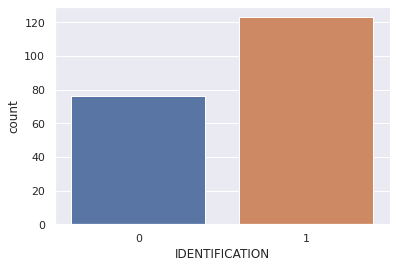

In [ ]:
#visualize the count
sns.countplot(df['IDENTIFICATION'])

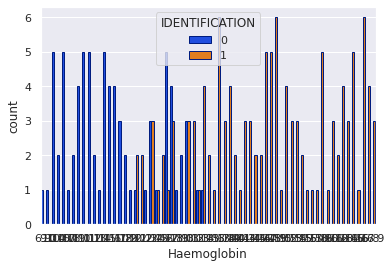

In [ ]:
#visualize the data
sns.countplot(x='Haemoglobin', hue='IDENTIFICATION', data=df, palette='bright',edgecolor= sns.color_palette('dark',n_colors=1))

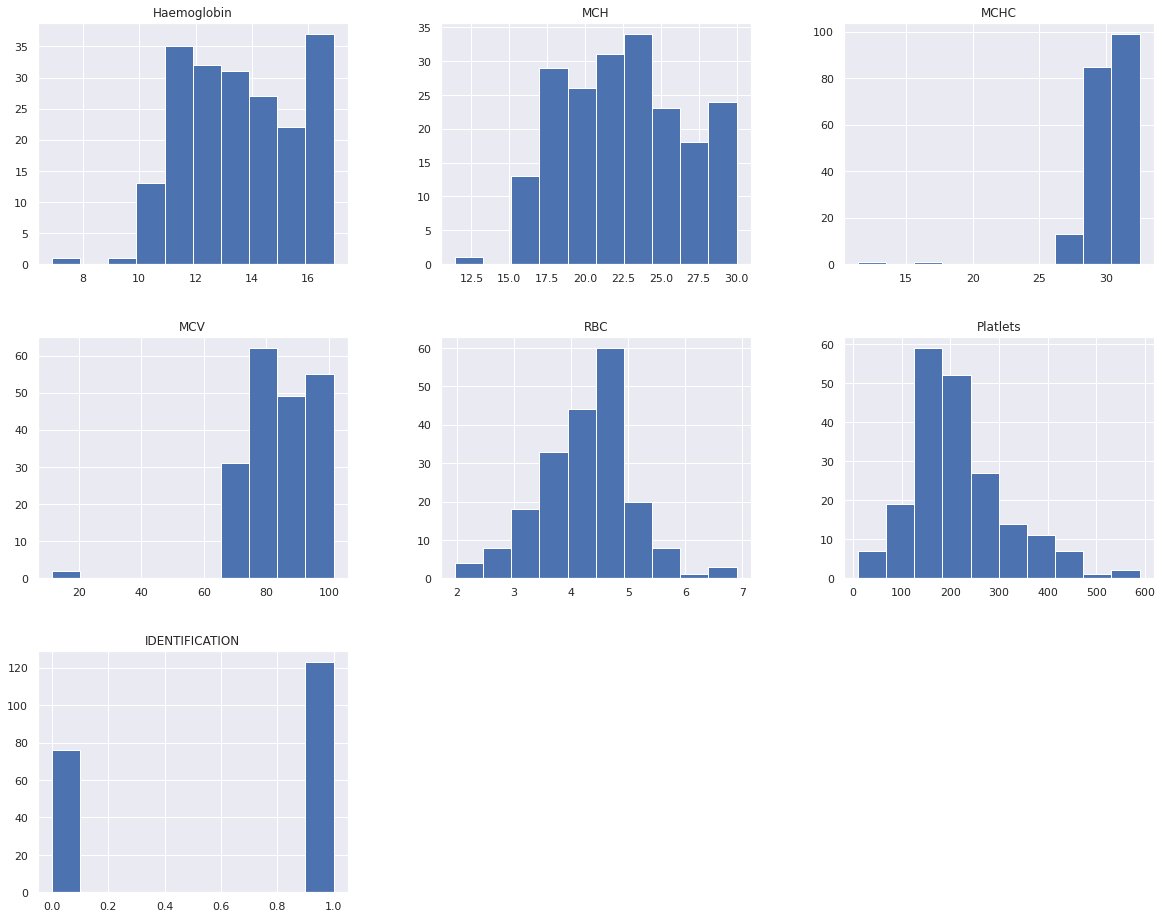

In [ ]:
df.hist(figsize=(20,16))
plt.show()

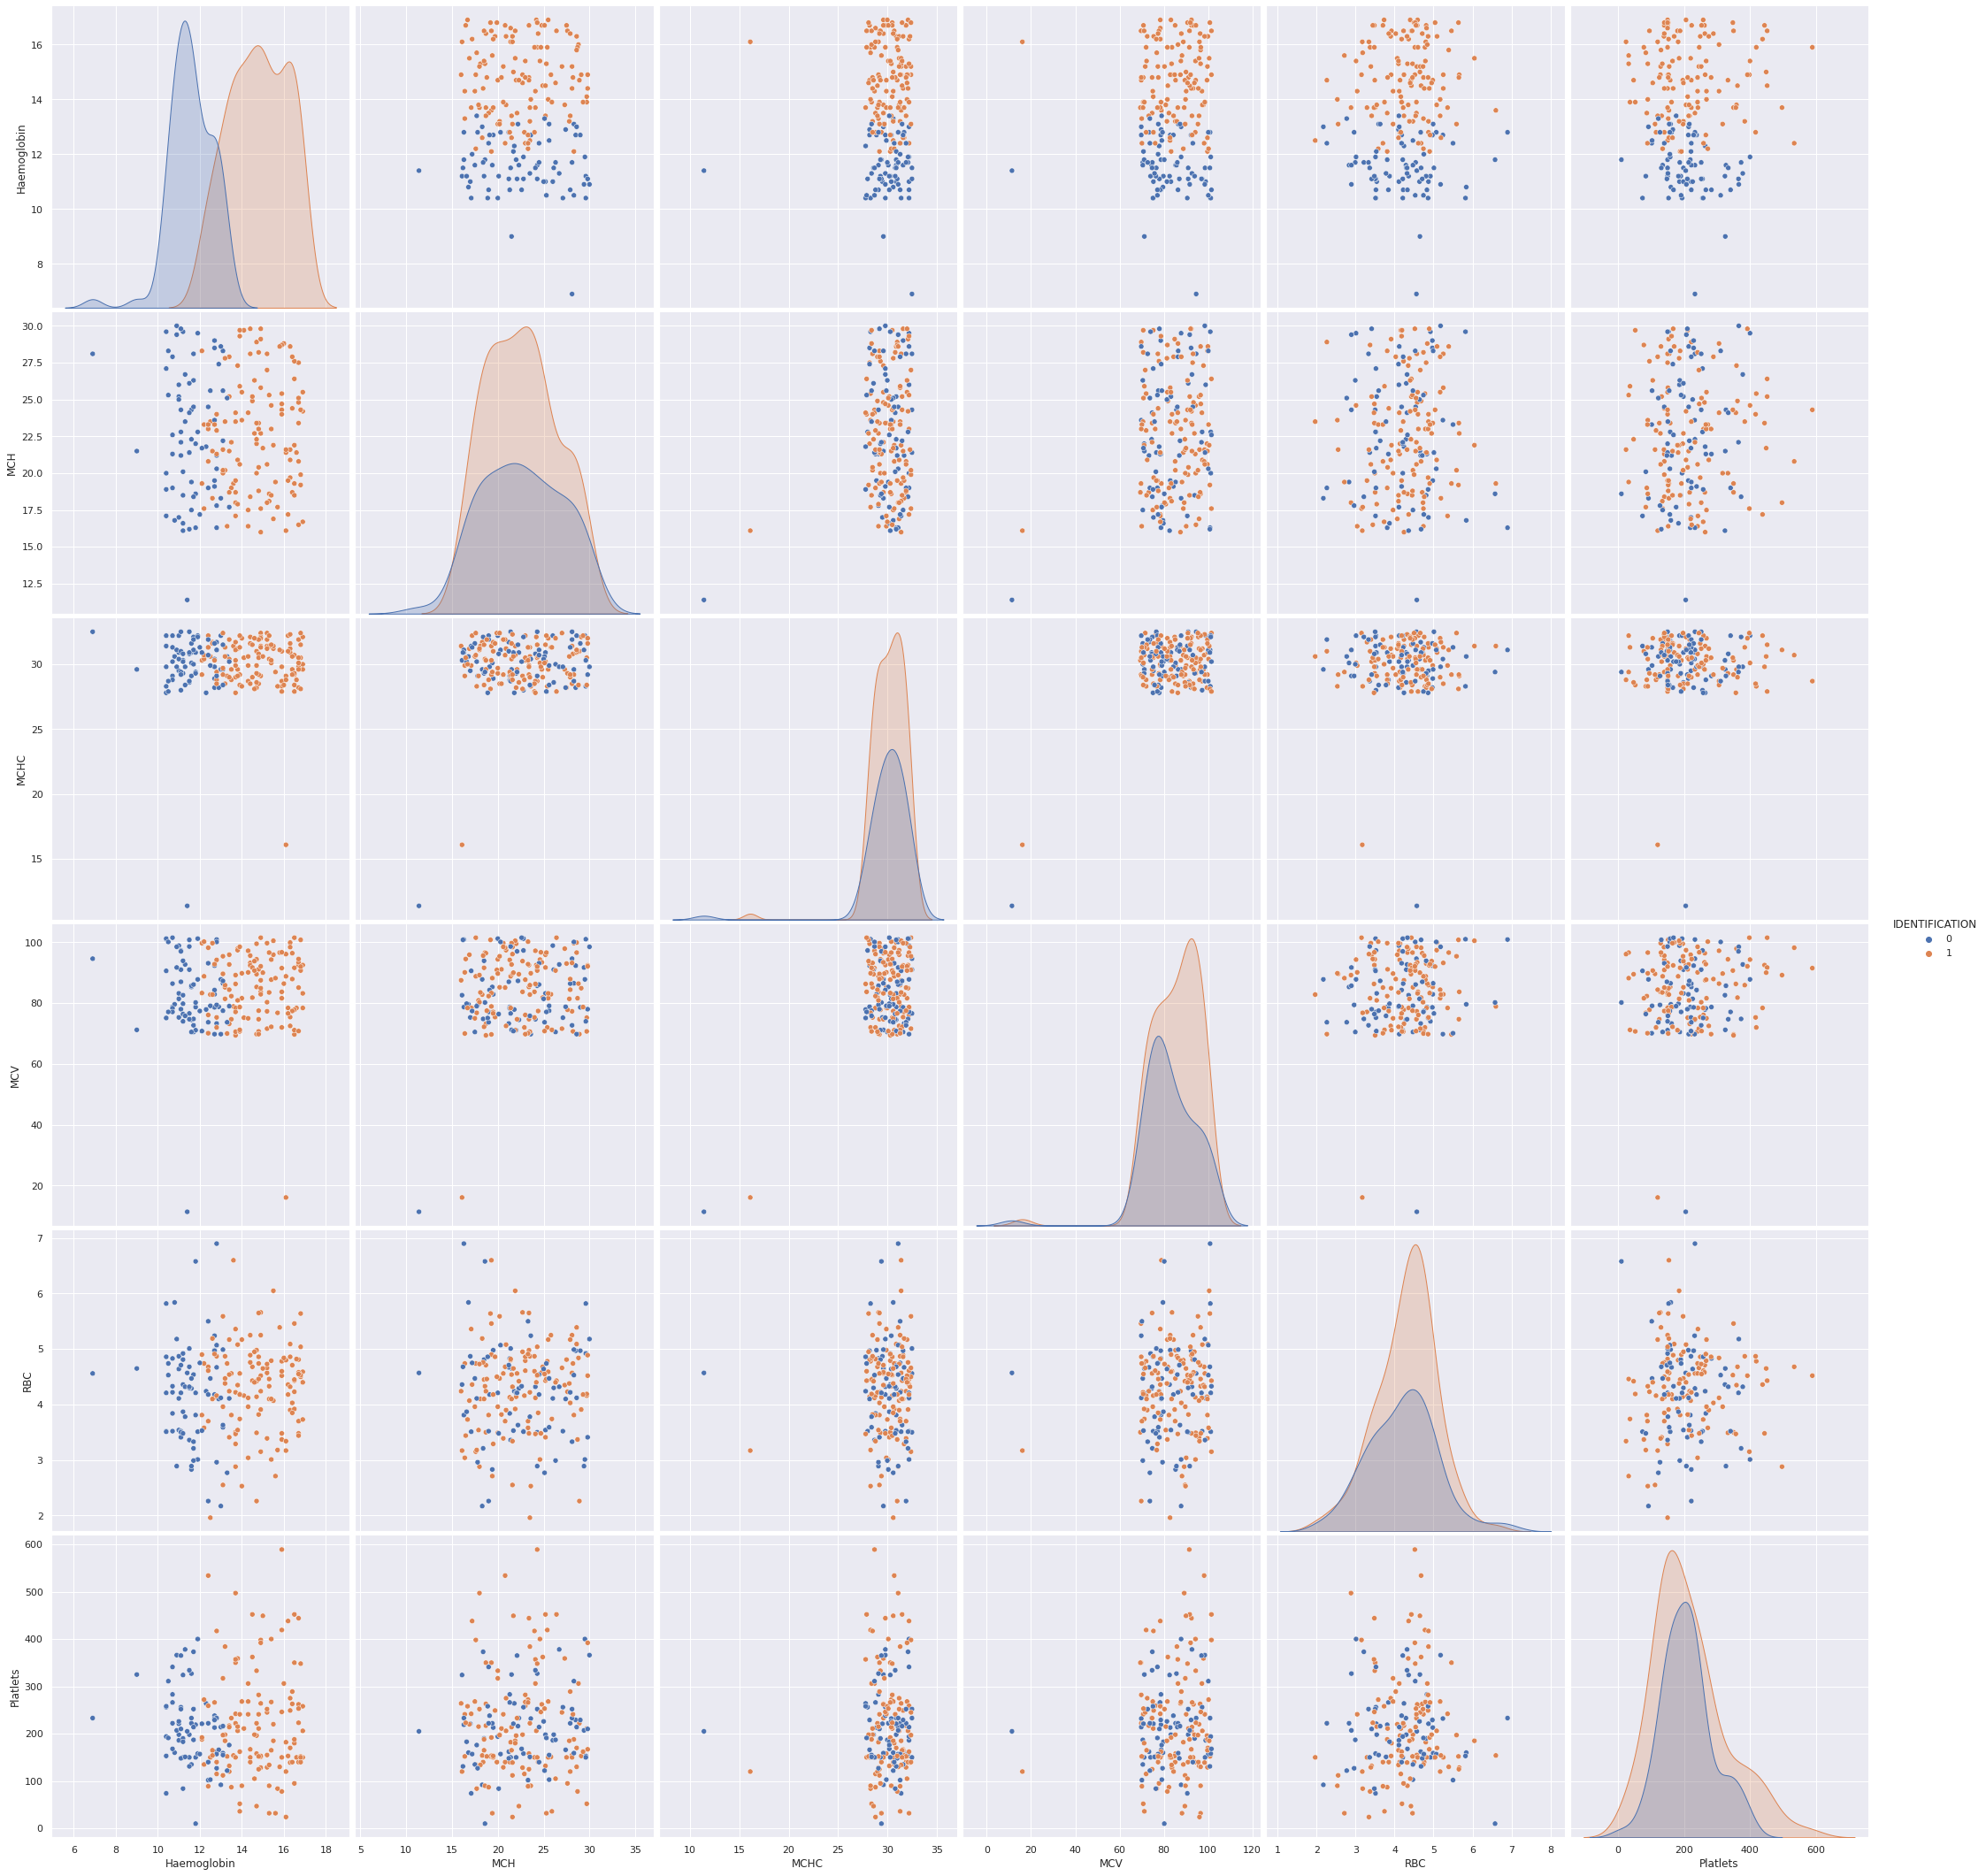

In [ ]:
sns.pairplot(df, hue = "IDENTIFICATION", height = 5, aspect = 1);

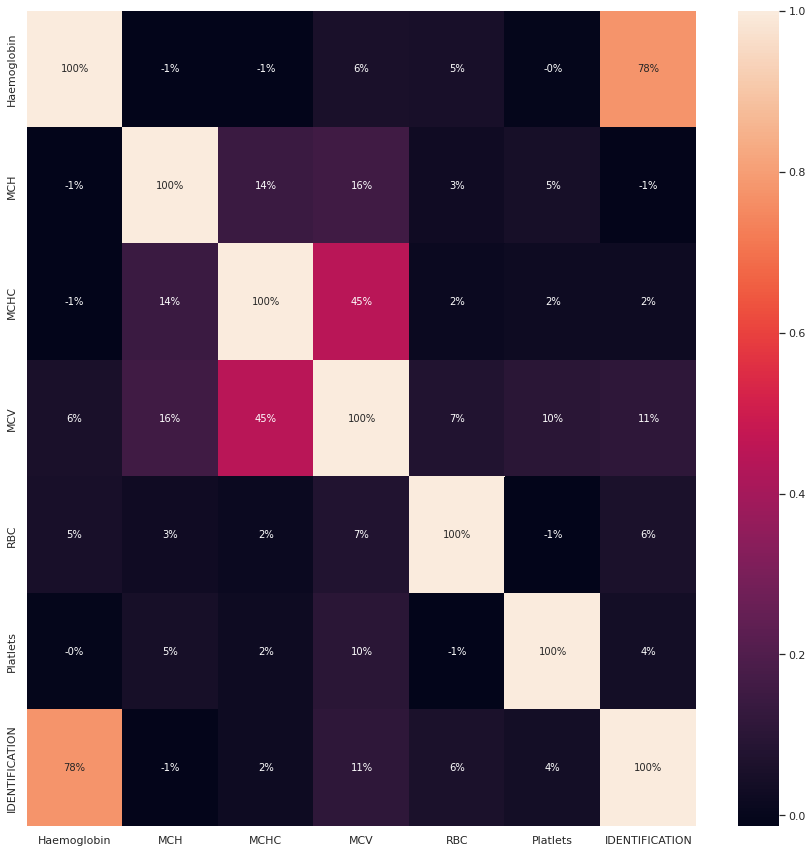

In [ ]:
#visualize the data
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

In [ ]:
#Split the data into independent (X) dataset (the features) and dependent (Y) dataset (the target)
X = df.drop(['IDENTIFICATION'], axis=1)
Y = df['IDENTIFICATION']

In [ ]:
#Feature Scaling 
#Min-Max scaler method scales the dataset so that all the input features lie between 0 and 1
X_scaler = MinMaxScaler()
X_scaler.fit(X)
column_names = X.columns
X[column_names] = X_scaler.transform(X)

In [ ]:
#Split the data into 80% training and 20% testing &shuffle
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle =True)

In [ ]:
len(X_train)

159

In [ ]:
len(X_test)

40

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#create param
model_param = {
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'criterion': ['gini','entropy']
        }
    },
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [20,50,80,120,150]
        }
    },
    'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'param':{
            'n_neighbors': [5,10,15,20,25]
        }
    },
  

}

In [ ]:
scores = []
for model_name, mp in model_param.items():
  model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
  model_selection.fit(X,Y)
  scores.append({
      'model': model_name,
      'best_score': model_selection.best_score_,
      'best_params': model_selection.best_params_
  })

In [ ]:
df_model_score = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df_model_score

,model,best_score,best_params
0,DecisionTreeClassifier,0.879359,{'criterion': 'entropy'}
1,RandomForestClassifier,0.904359,{'n_estimators': 120}
2,KNeighborsClassifier,0.884487,{'n_neighbors': 25}


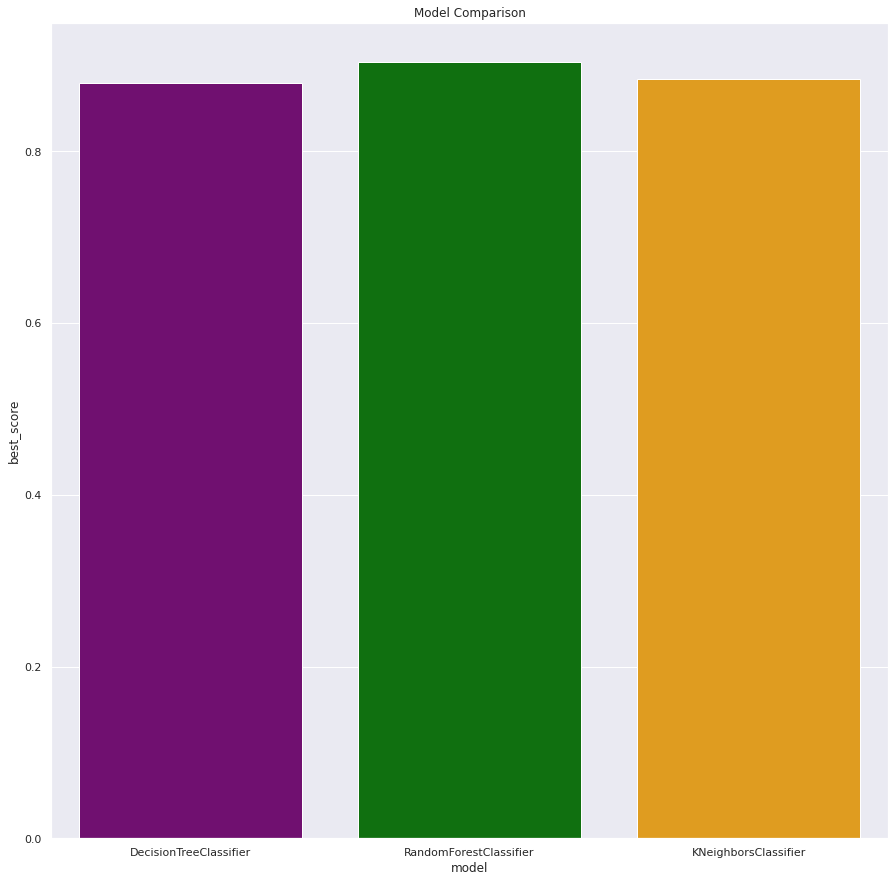

In [ ]:
colors = ["purple", "green", "orange", "red","#0FBBAE", "yellow"]
fig = plt.figure(figsize=(15,15))
sns.barplot(x='model',y='best_score',data=df_model_score, palette= colors)
plt.title('Model Comparison');

In [ ]:
model_rfc = RandomForestClassifier(n_estimators=120)

In [ ]:
model_rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=120)

In [ ]:
model_rfc.score(X_test,Y_test)

0.825

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,model_rfc.predict(X_test))
cm

array([[12,  4],
       [ 3, 21]])

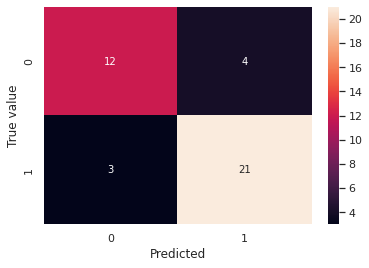

In [ ]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')
plt.show()

In [ ]:
#Build the model
model = Sequential()
model.add( Dense(256, input_dim = len(X.columns), kernel_initializer= k.initializers.random_normal(seed=13), activation='relu'))
model.add( Dense(1, activation = 'hard_sigmoid'))

In [ ]:
#Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Train the model
history = model.fit(X_train, Y_train, epochs = 2000, batch_size = X_train.shape[0])

Epoch 1/2000
1/1 [==============================] - 1s 675ms/step - loss: 0.6988 - accuracy: 0.3648
Epoch 2/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6921 - accuracy: 0.5912
Epoch 3/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6857 - accuracy: 0.6226
Epoch 4/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6798 - accuracy: 0.6226
Epoch 5/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6744 - accuracy: 0.6226
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6693 - accuracy: 0.6226
Epoch 7/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6647 - accuracy: 0.6226
Epoch 8/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6606 - accuracy: 0.6226
Epoch 9/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6568 - accuracy: 0.6226
Epoch 10/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6534 - accuracy: 0.6226
Epoch 11/2000
1/1

In [ ]:
#Save the model
model.save('ana.model')

INFO:tensorflow:Assets written to: ana.model/assets


Text(0.5, 0, 'epoch')

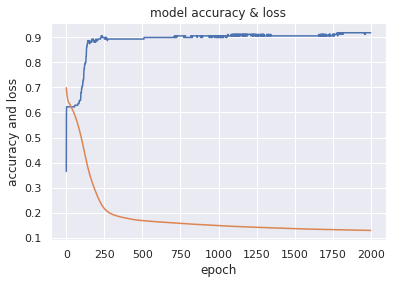

In [ ]:
#Visualize the models loss and accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy & loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [ ]:
max(history.history['accuracy'])

0.9182389974594116

In [ ]:
#Get the shape of the training and testing dataset
print('shape of training data:', X_train.shape)
print('shape of test data:', X_test.shape)

shape of training data: (159, 6)
shape of test data: (40, 6)


In [ ]:
#Show the actual and predicted values
pred = model.predict(X_test)
pred = [1 if Y>=0.5 else 0 for Y in pred]
pred

print('Original : {0}'.format(", ".join(str(x) for x in Y_test)))
print('Predicted : {0}'.format(", ".join(str(x) for x in pred)))

Original : 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0
Predicted : 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0


In [ ]:
#Show the actual values
Y_test

70     0
42     1
86     1
57     1
181    0
161    1
7      0
171    0
29     1
155    1
198    1
16     1
103    0
102    0
35     1
145    1
158    1
8      1
101    0
64     1
147    1
4      1
179    1
121    1
130    1
83     0
14     1
191    0
63     0
170    0
24     0
36     1
89     1
88     0
185    1
10     0
79     1
71     0
99     1
144    0
Name: IDENTIFICATION, dtype: int64